# Ultimate Technologies, Inc. Take-Home Challenge

In [57]:
import json
import pandas as pd

logins = pd.read_json('logins.json', convert_dates=['login_time'])
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


## Exploratory data analysis

Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [58]:
logins = logins.set_index('login_time')
logins['logins'] = 1
logins.head()

,logins
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [59]:
logins_15min = logins.resample('15min').sum()
logins_15min.head()

,logins
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


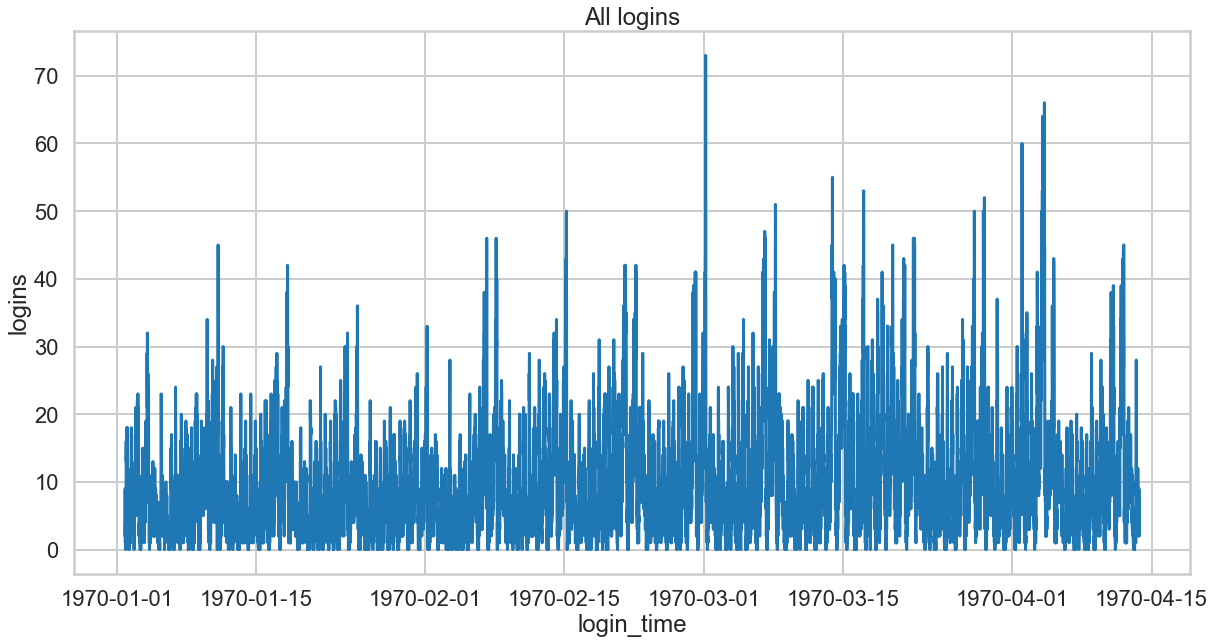

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("poster")

_ = sns.lineplot(data=logins_15min, x='login_time', y='logins')
_.set_title('All logins')
plt.gcf().set_size_inches(20, 10)

As we can see from our first Time Series plot of all the logins, there seem to be some cycles throughout the month. A closer look at the month of January should give us more insight.

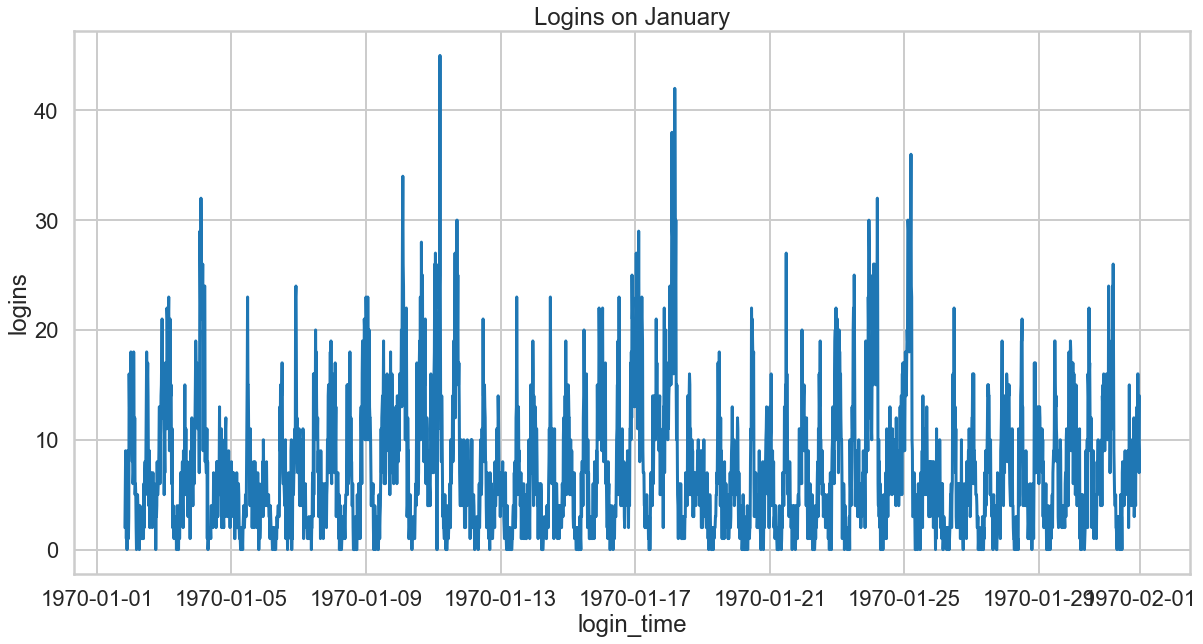

In [61]:
_ = sns.lineplot(data=logins_15min.loc['1970-01'], x='login_time', y='logins')
_.set_title('Logins on January')
plt.gcf().set_size_inches(20, 10)

We can now see that there are possibly some weekly cycles. A comparison between 3 different weeks will be able to tell us if we have corresponding peaks each week.

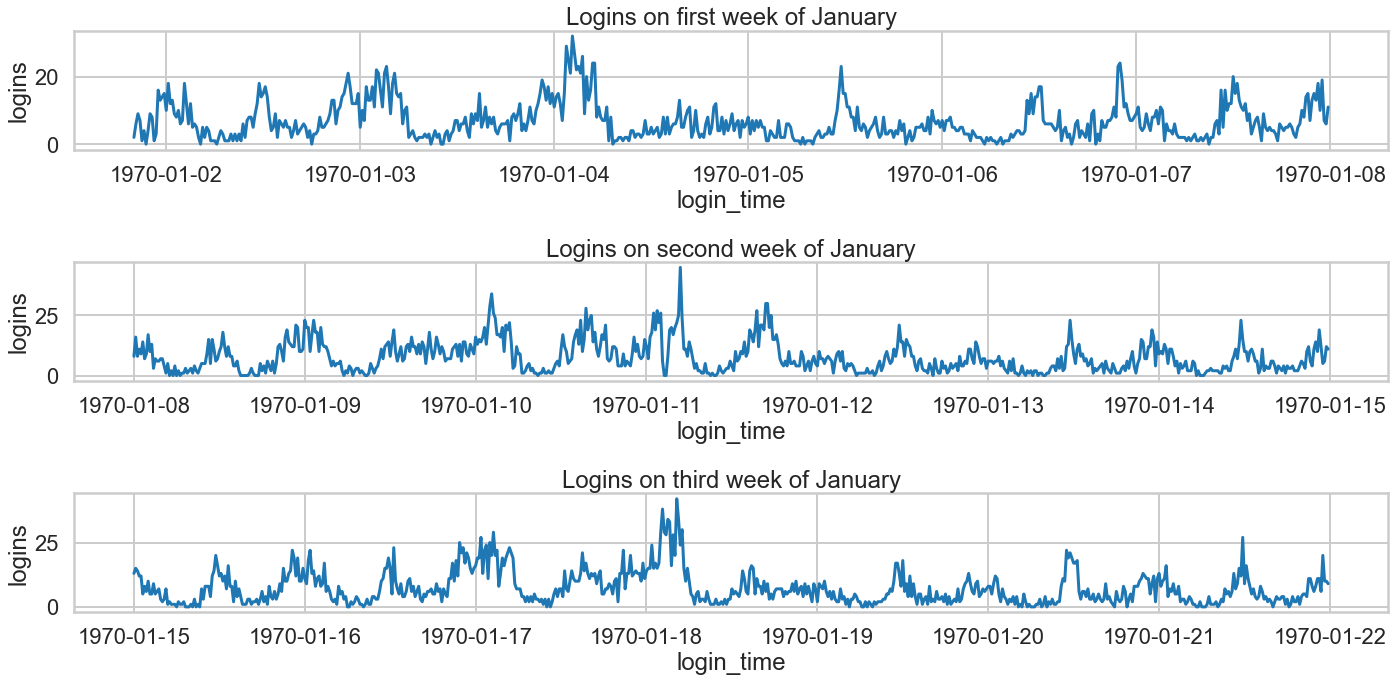

In [62]:
_ = plt.subplot(3,1,1)
_ = sns.lineplot(data=logins_15min.loc['1970-01-01':'1970-01-07'], x='login_time', y='logins')
_.set_title('Logins on first week of January')

_ = plt.subplot(3,1,2)
_ = sns.lineplot(data=logins_15min.loc['1970-01-08':'1970-01-14'], x='login_time', y='logins')
_.set_title('Logins on second week of January')

_ = plt.subplot(3,1,3)
_ = sns.lineplot(data=logins_15min.loc['1970-01-15':'1970-01-21'], x='login_time', y='logins')
_.set_title('Logins on third week of January')

plt.gcf().set_size_inches(20, 10)
plt.tight_layout()

We can now see that there is a peak every week on the exact same day. A quick search on Google yields this day as **Sunday**.

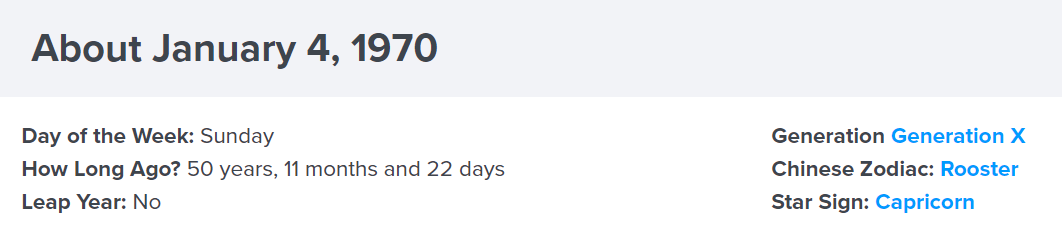

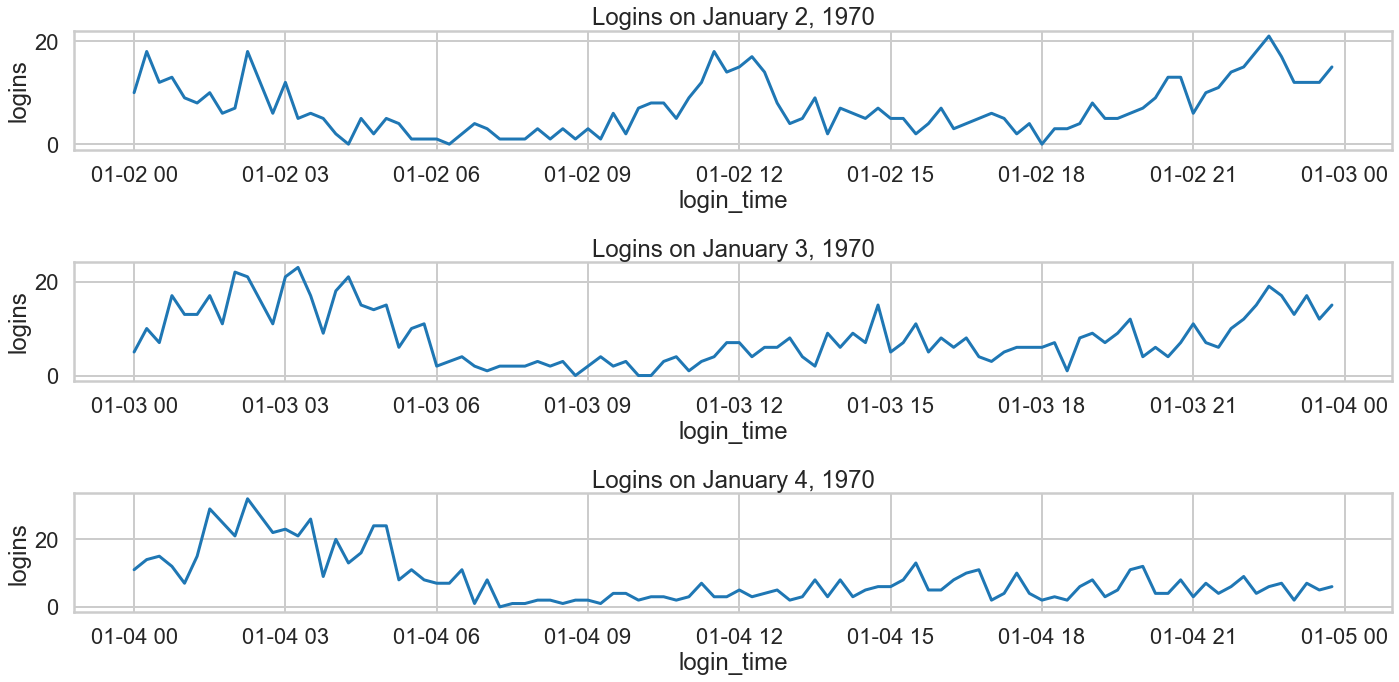

In [63]:
_ = plt.subplot(3,1,1)
_ = sns.lineplot(data=logins_15min.loc['1970-01-02'], x='login_time', y='logins')
_.set_title('Logins on January 2, 1970')

_ = plt.subplot(3,1,2)
_ = sns.lineplot(data=logins_15min.loc['1970-01-03'], x='login_time', y='logins')
_.set_title('Logins on January 3, 1970')

_ = plt.subplot(3,1,3)
_ = sns.lineplot(data=logins_15min.loc['1970-01-04'], x='login_time', y='logins')
_.set_title('Logins on January 4, 1970')

plt.gcf().set_size_inches(20, 10)
plt.tight_layout()

When examining daily information, the cycles are not as clear cut. However, we can see that there is generally **an increase in logins at night and noon**.

In [64]:
logins_15min['date'] = [index.date() for index in logins_15min.index]
logins_15min.head()

,logins,date
login_time,,
1970-01-01 20:00:00,2,1970-01-01
1970-01-01 20:15:00,6,1970-01-01
1970-01-01 20:30:00,9,1970-01-01
1970-01-01 20:45:00,7,1970-01-01
1970-01-01 21:00:00,1,1970-01-01


In [65]:
from datetime import datetime as dt
from collections import Counter
import numpy as np

max_per_day = []

for index,row in logins_15min.groupby('date').max().iterrows():
    df = logins_15min[logins_15min['date'] == index]
    max_per_day.append(df[df['logins'] == row['logins']].index.strftime('%H:%M').tolist())
    
max_per_day = [item for sublist in max_per_day for item in sublist]
max_per_day = [dt.strptime(date, "%H:%M").time().hour for date in max_per_day]
Counter(max_per_day).most_common()

[(11, 31),
 (22, 21),
 (4, 17),
 (23, 13),
 (3, 6),
 (12, 6),
 (21, 6),
 (2, 5),
 (1, 5),
 (0, 3),
 (5, 2),
 (10, 1)]

By counting every daily peak/s in our data, we can see that **most peaks happen around 11AM, 10PM, 4AM, and 11PM.**

In [66]:
[number for number in range(0,24) if number not in list(Counter(max_per_day).keys())]

[6, 7, 8, 9, 13, 14, 15, 16, 17, 18, 19, 20]

We can also see that there are **never any peaks from 6-8AM and 1-7PM**. We can therefore conclude that **logins pick up in the hours around noontime and from nighttime to early morning**.

## Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs. 

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    <br>a. how you will implement the experiment
    <br>b. what statistical test(s) you will conduct to verify the significance of the
    observation
    <br>c. how you would interpret the results and provide recommendations to the city
    operations team along with any caveats.

**1. My measure of success would be amount of times Ultimate Technologies pays for the toll between Gotham and Metropolis. The higher this frequency, the more we know people are taking advantage of our new reimbursement program. 
<br>2. To implement this experiment, I would roll out this program for a limited time, most likely 1 month. Then, I would conduct a paired t-test between the frequencies of paying for the toll before and after the implementation of the program. Using a p-value of 0.05, I would evaluate whether the frequency of people taking advantage of our new program was a statistically significant increase. If yes, I would consider the experiment a success. If not, I would recommend either a stop or a modification to the program.**

## Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. <br>
<br>
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. <br>
<br>
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?<br>
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.<br>
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

In [67]:
challenge = pd.read_json('ultimate_data_challenge.json', convert_dates=['last_trip_date', 'signup_date'])
challenge.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [68]:
challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [69]:
np.max(challenge['last_trip_date'])

Timestamp('2014-07-01 00:00:00')

Since a user is considered *active* if they took a trip in the 30 days preceding the date of data collection, and I was not given the date of data collection, I will have to take the latest date in `last_trip_date` and use it to determine user retention. First, I will add a new column to the DataFrame, signaling if a user is active depending on whether they took a trip in the 30 days preceding **07-01** or not.

In [70]:
from datetime import timedelta

cutoff_date = np.max(challenge['last_trip_date']) - timedelta(days=30)
challenge['active'] = [date > cutoff_date for date in challenge['last_trip_date']]
challenge.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [71]:
len(challenge[challenge['active'] == True]) / len(challenge) * 100

36.620000000000005

Using our new column, we can see that our retention rate for this DataFrame is **36.62%**.

In [72]:
challenge['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

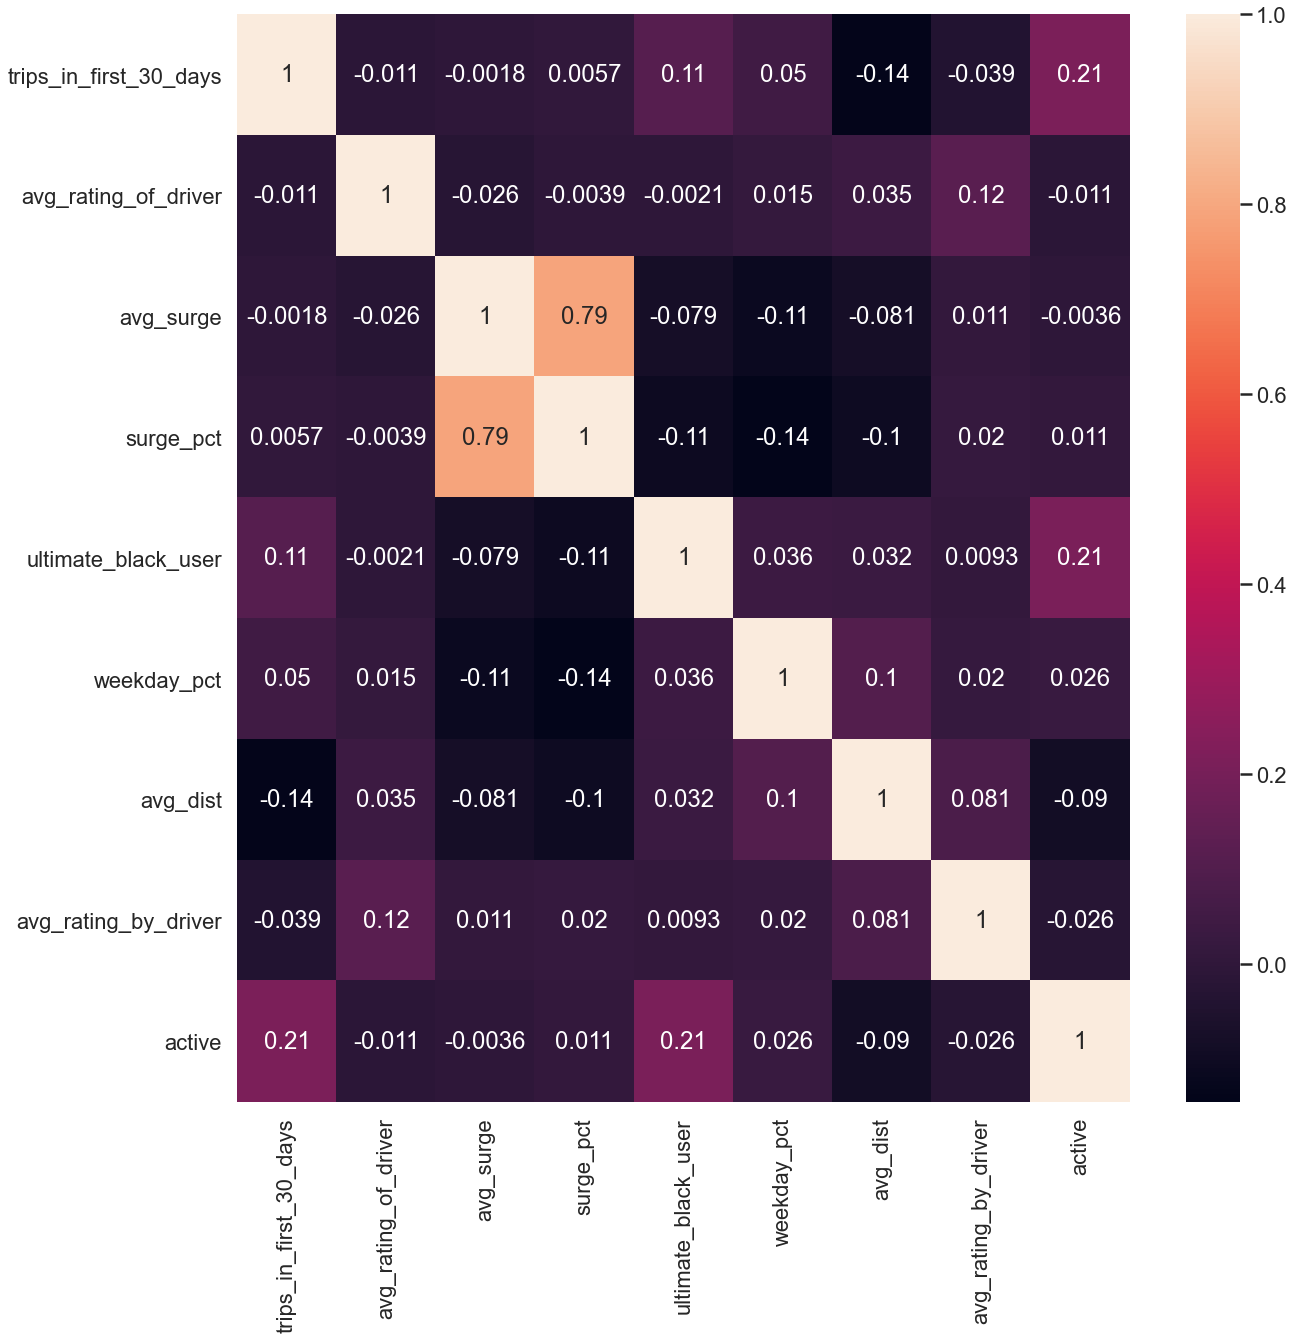

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("poster")

_ = sns.heatmap(challenge.corr(), yticklabels=True, annot=True)
plt.gcf().set_size_inches(20, 20)

Using a correlation heatmap, it looks like there isn't much correlation between a user's retention and any other variables. The **strongest correlations are `trips_in_first_30_days` and `ultimate_black_user`, but these correlations are fairly weak (\$r^{2}$ = 0.21).**

We are now ready to preprocess our data for modeling. First, I will remove the `last_trip_date`, it being a redundant column now that we have an `active` column. I will then dummy encode all the categorical variables in the DataFrame.

In [74]:
challenge = challenge.drop(['last_trip_date', 'phone', 'signup_date'], axis=1)
challenge.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,4.7,1.10,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,5.0,1.00,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,4.3,1.00,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,4.6,1.14,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,4.4,1.19,11.8,False,82.4,3.13,4.9,False


In [75]:
challenge.dtypes

city                       object
trips_in_first_30_days      int64
avg_rating_of_driver      float64
avg_surge                 float64
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
active                       bool
dtype: object

With all the column dtypes corrected, we can continue with the dummy encoding.

In [76]:
df = pd.get_dummies(challenge, columns=['ultimate_black_user', 'city'], drop_first=True)
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,ultimate_black_user_True,city_King's Landing,city_Winterfell
0,4,4.7,1.10,15.4,46.2,3.67,5.0,True,1,1,0
1,0,5.0,1.00,0.0,50.0,8.26,5.0,False,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,False,0,0,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,True,1,1,0
4,14,4.4,1.19,11.8,82.4,3.13,4.9,False,0,0,1


In [77]:
df.dtypes

trips_in_first_30_days        int64
avg_rating_of_driver        float64
avg_surge                   float64
surge_pct                   float64
weekday_pct                 float64
avg_dist                    float64
avg_rating_by_driver        float64
active                         bool
ultimate_black_user_True      uint8
city_King's Landing           uint8
city_Winterfell               uint8
dtype: object

In [78]:
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

tests = {}
cols = [col for col in df.columns if col != 'active']

for number in tqdm(range(10), position=0, leave=True):
    best_cols = []
    best_auc = 0
    
    for column in cols:
        auc_score = []
        best_cols.append(column)
    
        for number in range(5):
            X = df.loc[df[best_cols].notnull().all(axis=1)][best_cols]
            y = df.loc[df[best_cols].notnull().all(axis=1)]['active']

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

            model = LogisticRegression(max_iter=10000).fit(X_train, y_train)

            probs = model.predict_proba(X_test)
            probs = probs[:,1]
        
            auc_score.append(roc_auc_score(y_test, probs))
    
        mean = np.mean(auc_score)
        if mean > best_auc:
            best_auc = mean
        else:
            best_cols.remove(column)
    tests[best_auc] = best_cols
print(tests)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:04<00:00,  6.49s/it]

{0.7353916805001721: ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'avg_dist', 'ultimate_black_user_True', "city_King's Landing", 'city_Winterfell'], 0.7265639539979162: ['trips_in_first_30_days', 'avg_rating_of_driver', 'surge_pct', 'ultimate_black_user_True', "city_King's Landing"], 0.7333304698185548: ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_dist', 'avg_rating_by_driver', 'ultimate_black_user_True', "city_King's Landing", 'city_Winterfell'], 0.7334470744740244: ['trips_in_first_30_days', 'avg_rating_of_driver', 'surge_pct', 'avg_dist', 'avg_rating_by_driver', 'ultimate_black_user_True', "city_King's Landing", 'city_Winterfell'], 0.7331949237392754: ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'avg_dist', 'ultimate_black_user_True', "city_King's Landing", 'city_Winterfell'], 0.731928733859429: ['trips_in_first_30_days', 'avg_rating_of_driver', 'ultimate_black_user_True', "city_King's Landing", 'city_Winterf

In [79]:
from sklearn.ensemble import RandomForestClassifier

tests = {}
cols = [col for col in df.columns if col != 'active']

for number in tqdm(range(10), position=0, leave=True):
    best_cols = []
    best_auc = 0
    
    for column in cols:
        auc_score = []
        best_cols.append(column)
    
        for number in range(5):
            X = df.loc[df[best_cols].notnull().all(axis=1)][best_cols]
            y = df.loc[df[best_cols].notnull().all(axis=1)]['active']

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

            model = RandomForestClassifier().fit(X_train, y_train)

            probs = model.predict_proba(X_test)
            probs = probs[:,1]
        
            auc_score.append(roc_auc_score(y_test, probs))
    
        mean = np.mean(auc_score)
        if mean > best_auc:
            best_auc = mean
        else:
            best_cols.remove(column)
    tests[best_auc] = best_cols
print(tests)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [20:36<00:00, 123.63s/it]

{0.8121852086138371: ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'ultimate_black_user_True', "city_King's Landing", 'city_Winterfell'], 0.822914924115682: ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_rating_by_driver', 'ultimate_black_user_True', "city_King's Landing", 'city_Winterfell'], 0.8200906280564549: ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_rating_by_driver', 'ultimate_black_user_True', "city_King's Landing", 'city_Winterfell'], 0.8216384027148903: ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_rating_by_driver', 'ultimate_black_user_True', "city_King's Landing", 'city_Winterfell'], 0.8181677100499307: ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_rating_by_driver', 'ultimate_black_user_True', "city_King's Landing", 'city_Win

Between a logistic regression model and a Random Forest classifier, the **Random Forest classifier is more accurate**. As a result, we will work with the Random Forest classifier and try to improve its accuracy. Luckily for us, we have already achieved **>80% accuracy with a Random Forest classifier right out of the box!** This is already quite accurate, but perhaps we can make it more accurate.

In [102]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV

grid_params = {'randomforestclassifier__n_estimators': [100, 300, 500, 800, 1200],
               'randomforestclassifier__max_depth': [None, 5, 8, 15, 25, 30],
               'randomforestclassifier__min_samples_split': [2, 5, 10, 15, 100],
               'randomforestclassifier__min_samples_leaf': [1, 2, 5, 10],
               'standardscaler': [StandardScaler(), None]}

df = df.loc[df.notnull().all(axis=1)]

rf_pipe = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

X_cols = [col for col in df.columns if col != 'active']

X = df[X_cols]
y = df['active']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

active_rf_random = RandomizedSearchCV(rf_pipe, param_distributions=grid_params, cv=5, n_jobs=-1, verbose=1)
active_rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.9min finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [None,
                                                                              5,
                                                                              8,
                                                                              15,
                                                                              25,
                                                                              30],
                                        'randomforestclassifier__min_samples_leaf': [1,
                                                                                     2,


In [103]:
active_rf_random.best_params_

{'standardscaler': None,
 'randomforestclassifier__n_estimators': 500,
 'randomforestclassifier__min_samples_split': 15,
 'randomforestclassifier__min_samples_leaf': 10,
 'randomforestclassifier__max_depth': 30}

In [134]:
from sklearn.model_selection import GridSearchCV

grid_params = {'randomforestclassifier__n_estimators': [100, 300, 500, 800, 1200],
               'randomforestclassifier__max_depth': [30],
               'randomforestclassifier__min_samples_split': [2, 5, 10, 15, 100],
               'randomforestclassifier__min_samples_leaf': [10]}

df = df.loc[df.notnull().all(axis=1)]

rf_pipe = make_pipeline(
    RandomForestClassifier()
)

X_cols = [col for col in df.columns if col != 'active']

X = df[X_cols]
y = df['active']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

active_rf_grid = GridSearchCV(rf_pipe, param_grid=grid_params, cv=5, n_jobs=-1, verbose=1)
active_rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 13.6min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [30],
                         'randomforestclassifier__min_samples_leaf': [10],
                         'randomforestclassifier__min_samples_split': [2, 5, 10,
                                                                       15,
                                                                       100],
                         'randomforestclassifier__n_estimators': [100, 300, 500,
                                                                  800, 1200]},
             verbose=1)

In [135]:
active_rf_grid.best_estimator_

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=30, min_samples_leaf=10,
                                        min_samples_split=100,
                                        n_estimators=1200))])

Wall time: 1min 8s


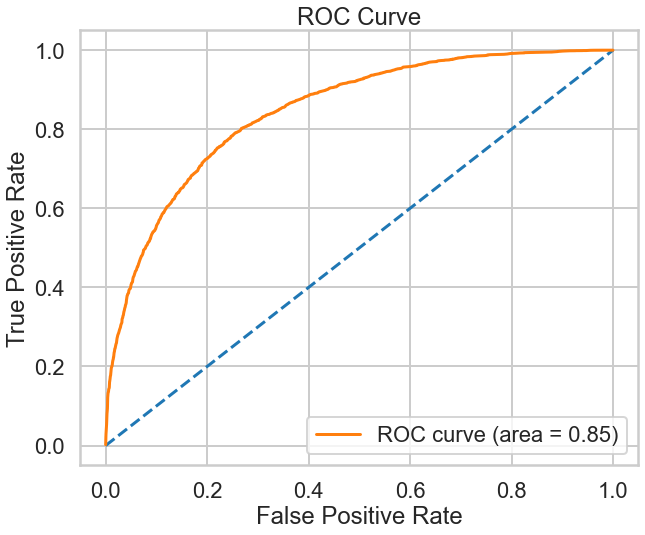

In [136]:
%%time

from sklearn.metrics import roc_curve

X = df[X_cols]
y = df['active']

model = active_rf_grid.best_estimator_.fit(X_train, y_train)

probs = model.predict_proba(X_test)
probs = probs[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)

_ = sns.lineplot(x=[0,1], y=[0,1], linestyle='--')
_ = sns.lineplot(x=fpr, y=tpr, label='ROC curve (area = %0.2f)' % auc_score)
_ = plt.gcf().set_size_inches(10, 8)
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.legend(loc="lower right")

After tuning our hyperparameters, I was able to achieve an AUC of **85%**, which is not bad at all! This evaluation metric, the **AUC, stands for the Area Under the ROC Curve**. An AUC of over 80% is considered very good, so 85% is quite an accomplishment.

A closer look at the model will help us evaluate the most important features.

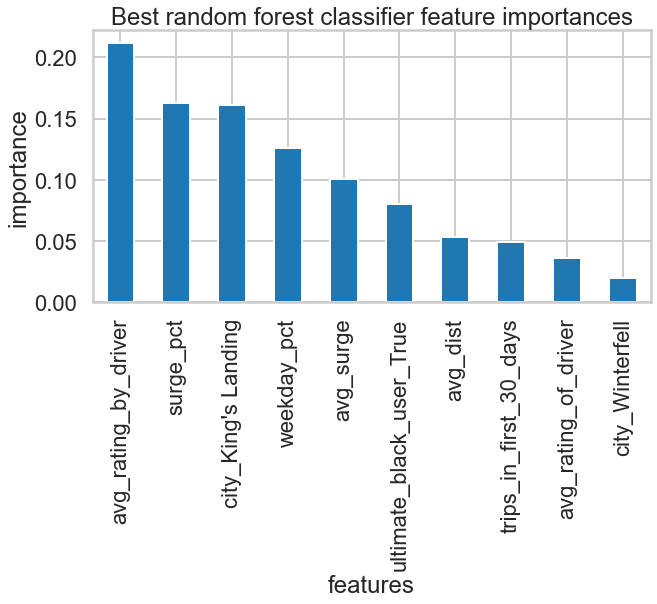

In [140]:
plt.subplots(figsize=(10, 5))
imps = active_rf_grid.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest classifier feature importances');

Interestingly enough, **none of the features were dramatically more important than the others. The most important feature was `avg_rating_by_driver`**, followed by `surge_pct`, `city_King's Landing`, and `weekday_pct`. Since none of the features shared a strong correlation with our dependent variable, that would explain why none of the features were more than 25% important.

Using this model, I would recommend that Ultimate **focus more of its advertising efforts on King's Landing**, as those residents were more likely to be active users. I would perhaps also recommend some sort of **incentive program to reward good riders**, as average ratings by drivers was the single most important feature for predicting an active user. 